In [1]:
!pip install Orange3

     |████████████████████████████████| 29.0 MB 3.8 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 84 kB 1.9 MB/s 
     |████████████████████████████████| 68 kB 3.5 MB/s 
     |████████████████████████████████| 79 kB 5.8 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 2.5 MB 50.8 MB/s 
     |████████████████████████████████| 492 kB 59.7 MB/s 
     |████████████████████████████████| 51 kB 5.3 MB/s 
     |████████████████████████████████| 253 kB 6.7 MB/s 
     |████████████████████████████████| 11.3 MB 57.7 MB/s 
     |████████████████████████████████| 1.1 MB 39.3 MB/s 
     |████████████████████████████████| 992 kB 45.3 MB/s 
     |████████████████████████████████| 24.8 MB 54.4 MB/s 
  Created wheel for serverfiles: filename=serverfiles-0.3.1-py3-none-any.whl size=6933 sha256=688f25717c4e53c5ad0d44d5d747b4f10cf288b592c4c1fff7632e16c59f3500
  Stored in directory: /root/.cache/pip/

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from sklearn.metrics import recall_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.evaluate import paired_ttest_5x2cv
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from scipy import stats as stats
from scipy.stats import rankdata
from sklearn.linear_model import LogisticRegression
#from orange3.evaluation import compute_CD, graph_ranks
import Orange as ora
import matplotlib.pyplot as plt

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Comparing multiple classifiers over multiple datasets

In [3]:
#balanced data
data_rapid = pd.read_csv("../input/dt-covid-influ-balanced/df_rapid_covid_inf.csv")
data_rapid=data_rapid.astype(int)
del data_rapid['Unnamed: 0']
data_rapid['Class'] = data_rapid['Classe']
del data_rapid['Classe']

data_pcr= pd.read_csv("../input/dt-covid-influ-balanced/df_pcr_covid_inf.csv")
data_pcr=data_pcr.astype(int)
del data_pcr['Unnamed: 0']
data_pcr['Class'] = data_pcr['Classe']
del data_pcr['Classe']



data_both= pd.read_csv("../input/dt-covid-influ-balanced/df_both_covid_inf.csv")
data_both=data_both.astype(int)
del data_both['Unnamed: 0']
data_both['Class'] = data_both['Classe']
del data_both['Classe']



#unbalanced data
data_rapid_unb = pd.read_csv("../input/inputdtcovidinfluunbalanced/df_rapid_covid_inf_unb.csv")
data_rapid_unb=data_rapid_unb.astype(int)
del data_rapid_unb['Unnamed: 0']
data_rapid_unb['Class'] = data_rapid_unb['Classe']
del data_rapid_unb['Classe']

data_pcr_unb= pd.read_csv("../input/inputdtcovidinfluunbalanced/df_pcr_covid_inf_unb.csv")
data_pcr_unb=data_pcr_unb.astype(int)
del data_pcr_unb['Unnamed: 0']
data_pcr_unb['Class'] = data_pcr_unb['Classe']
del data_pcr_unb['Classe']


both_data_unb = pd.read_csv("../input/inputdtcovidinfluunbalanced/df_both_covid_inf_unb.csv")
both_data_unb = both_data_unb.astype(int)
del both_data_unb['Unnamed: 0']
both_data_unb['Class'] = both_data_unb['Classe']
del both_data_unb['Classe']

In [4]:
def RandomForest_classif(x_train,y_train,param):
    #Classification
    
    
    clf= RandomForestClassifier(**param)
    clf=clf.fit(x_train, y_train)
    
    return clf

def Kneighbors_classif(x_train,y_train,param):
    #Classification
    

    clf= KNeighborsClassifier(**param)
    clf= clf.fit(x_train, y_train)

    return clf

def DecisionTree_classif(x_train,y_train,param):
    #Classification
    
    clf = tree.DecisionTreeClassifier(**param)
    clf = clf.fit(x_train,y_train)
    
    return clf

def mpl_classif(x_train,y_train,param):
    
    clf =  MLPClassifier(**param)
    clf=clf.fit(x_train,y_train)
    
    return clf

def gb_classif(x_train,y_train,param):
    
    clf=GradientBoostingClassifier(**param)
    clf=clf.fit(x_train, y_train)
    
    return clf

def xgb_classif(x_train,y_train,param):
    clf = xgb.XGBClassifier(**param)
    
    return clf.fit(x_train, y_train)

def svc_classif(x_train,y_train,param):
    
    regr = svm.SVC(**param)
    regr=regr.fit(x_train, y_train)
    
    return regr

def lg_with_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
    
    return clf
def lg_without_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
   
    return clf

In [5]:
def calculate_metrics(x_train, x_test,y_train, y_test,clf):
    
        #prediction
        y_pred=clf.predict(x_test)
        
        #recall
        recall= recall_score(y_test,y_pred, average='macro') *100
        
        
        return recall

In [6]:
def k_fold_cross_validation(x,y,lista_param):
    dt=pd.DataFrame(columns=['DT','RF','GBM','XGBoost','Mlp','SVM','KNN','LRR','LRR'],index=range(50))
    
    kf=RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
                        
    
    kf.get_n_splits(x,y)
    k=0
    for train_index, test_index in kf.split(x,y):

        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf_dt=DecisionTree_classif(x_train,y_train,lista_param[0])
        dt.iloc[k:k+1,:1]=calculate_metrics(x_train, x_test,y_train, y_test,clf_dt)
        
        clf_rf=RandomForest_classif(x_train,y_train,lista_param[1])
        dt.iloc[k:k+1,1:2]=calculate_metrics(x_train, x_test,y_train, y_test,clf_rf)
        
        clf_svm=svc_classif(x_train,y_train,lista_param[2])
        dt.iloc[k:k+1,5:6]=calculate_metrics(x_train, x_test,y_train, y_test,clf_svm)
       
        clf_knn=Kneighbors_classif(x_train,y_train,lista_param[3])
        dt.iloc[k:k+1,6:7]=calculate_metrics(x_train, x_test,y_train, y_test,clf_knn)
        
        clf_gbm=gb_classif(x_train,y_train,lista_param[4])
        dt.iloc[k:k+1,2:3]=calculate_metrics(x_train, x_test,y_train, y_test,clf_gbm)
        
        clf_lg_regu=lg_with_regu_classif(x_train,y_train,lista_param[5])
        dt.iloc[k:k+1,7:8]=calculate_metrics(x_train, x_test,y_train, y_test,clf_lg_regu)
        
        clf_lg=lg_without_regu_classif(x_train,y_train,lista_param[6])
        dt.iloc[k:k+1,8:9]=calculate_metrics(x_train, x_test,y_train, y_test,clf_lg)
        
        clf_mlp=mpl_classif(x_train,y_train,lista_param[7])
        dt.iloc[k:k+1,4:5]=calculate_metrics(x_train, x_test,y_train, y_test,clf_mlp)
        
        clf_xgboost=xgb_classif(x_train,y_train,lista_param[8])
        dt.iloc[k:k+1,3:4]=calculate_metrics(x_train, x_test,y_train, y_test,clf_xgboost)
        print(k)
        k+=1
        
        
        
    return  dt

In [7]:
def mean_performace(dt):
    # Then, we extract the performances as a numpy.ndarray.
    performances_array =  dt.iloc[:,:].values
    algorithms_names=dt.columns.values
    # Finally, we apply the Friedman test.
    t, p =stats.friedmanchisquare(*performances_array)
    # summarize
    print('P-value:' , p, 't-Statistic: %.3f' % (t))
    # interpret the result
    if p <= 0.1:
        print('Difference between mean performance is probably real')
    else:
        print('Algorithms probably have the same performance')

In [8]:
def calculate_average_ranks(dt):
    performances_array =  dt.iloc[:,:].values
    algorithms_names=dt.columns.values
    # Calculating the ranks of the algorithms for each dataset. The value of p is multipled by -1
    # because the rankdata method ranks from the smallest to the greatest performance values.
    # Since we are considering Recall as our performance measure, we want larger values to be best ranked.
    ranks = np.array([rankdata(-p) for p in performances_array])
    # Calculating the average ranks.
    average_ranks = np.mean(ranks, axis=0)
    print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))
    return average_ranks

In [9]:
def plot_critical_difference(dt,average_ranks,name):
    # This method computes the critical difference for Nemenyi test with alpha=0.1.
    # For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
    algorithms_names=dt.columns.values
    cd =  ora.evaluation.compute_CD(average_ranks,
    n=len(dt),
    alpha='0.1',
    test='nemenyi')
    # This method generates the plot.
    ora.evaluation.graph_ranks(average_ranks,
    names=algorithms_names,
    cd=cd,
    width=10,
    textspace=1.5,
    reverse=True)
    plt.savefig(name)
    plt.show()


# rapid balanced test

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
P-value: 3.370964846968135e-18 t-Statistic: 188.243
Difference between mean performance is probably real
DT average rank: 2.27
RF average rank: 1.67
GBM average rank: 2.06
XGBoost average rank: 4.0
Mlp average rank: 5.65
SVM average rank: 5.88
KNN average rank: 6.47
LRR average rank: 8.75
LRR average rank: 8.25


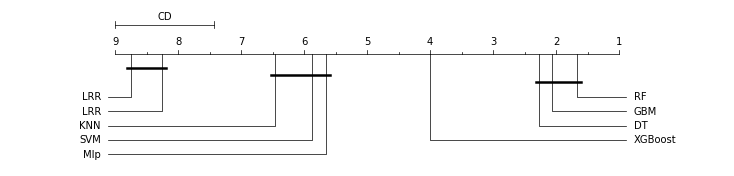

In [10]:

lista_param=[
             {},
             {},
             {'kernel': 'rbf', 'C': 6,'probability':True},
             {'weights': 'distance', 'n_neighbors': 15,'n_jobs': None, 'leaf_size': 5, 'algorithm': 'ball_tree'},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'solver': 'adam', 'random_state': 1, 'max_iter': 1200, 'learning_rate': 'adaptive','alpha': 0.0001, 'activation': 'relu'},
             {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

d_rapid=k_fold_cross_validation(data_rapid.iloc[:,0:16],data_rapid['Class'],lista_param) 

mean_performace(d_rapid)
d_rapid_average_ranks=calculate_average_ranks(d_rapid)
plot_critical_difference(d_rapid,d_rapid_average_ranks,'model_evaluation_rapid_balanced.jpg')


# This method computes the critical difference for Bonferroni-Dunn test with alpha=0.1.
# For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
cd = ora.evaluation.compute_CD(average_ranks,
n=len(dt),
alpha='0.1',
test='bonferroni-dunn')
# This method generates the plot.
ora.evaluation.graph_ranks(average_ranks,
names=algorithms_names,
cd=cd,
cdmethod=0,
width=10,
textspace=1.5,
reverse=True)
plt.show()


# rapid unbalanced test

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
P-value: 5.871579331408044e-26 t-Statistic: 234.098
Difference between mean performance is probably real
DT average rank: 1.9
RF average rank: 2.1
GBM average rank: 2.0
XGBoost average rank: 4.0
Mlp average rank: 5.7
SVM average rank: 6.06
KNN average rank: 6.24
LRR average rank: 9.0
LRR average rank: 8.0


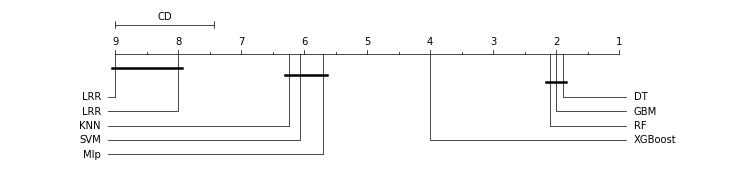

In [11]:

lista_param=[
{},
{},
{'kernel': 'rbf', 'C': 11,'probability':True},
{'weights': 'distance', 'n_neighbors': 5, 'n_jobs': None, 'leaf_size': 3, 'algorithm': 'kd_tree'},
{'n_estimators':500,'max_depth':5},
{'solver': 'saga', 'penalty': 'l2', 'max_iter': 1200, 'C': 0.1},
{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 400, 'C': 4.0},
{'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
{'n_estimators':300,'max_depth':9,'min_child_weight': 2}]          

d_rapid_unb=k_fold_cross_validation(data_rapid_unb.iloc[:,0:16],data_rapid_unb['Class'],lista_param) 

mean_performace(d_rapid_unb)
d_rapid_unb_average_ranks=calculate_average_ranks(d_rapid_unb)
plot_critical_difference(d_rapid_unb,d_rapid_unb_average_ranks,'model_evaluation_rapid_unbalanced.jpg')


# pcr balanced test

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
P-value: 1.480106521819803e-25 t-Statistic: 231.788
Difference between mean performance is probably real
DT average rank: 2.34
RF average rank: 1.59
GBM average rank: 2.07
XGBoost average rank: 4.0
Mlp average rank: 5.53
SVM average rank: 6.24
KNN average rank: 6.23
LRR average rank: 8.73
LRR average rank: 8.27


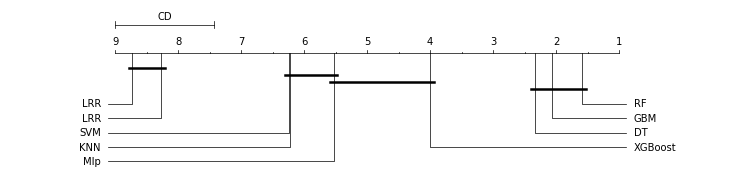

In [12]:

lista_param=[
{},
{},
{'kernel': 'rbf', 'C': 7,'probability':True},
{'weights': 'distance', 'n_neighbors': 5, 'n_jobs': None, 'leaf_size': 3, 'algorithm': 'kd_tree'},
{'n_estimators':500,'max_depth':5},
{'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
{'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
{'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
{'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

pcr_bal=k_fold_cross_validation(data_pcr.iloc[:,0:16],data_pcr['Class'],lista_param) 

mean_performace(pcr_bal)
d_pcr_bal_average_ranks=calculate_average_ranks(pcr_bal)
plot_critical_difference(pcr_bal,d_pcr_bal_average_ranks,'model_evaluation_pcr_balanced.jpg')


# pcr unbalanced test

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
P-value: 4.508274938958682e-23 t-Statistic: 217.363
Difference between mean performance is probably real
DT average rank: 2.5
RF average rank: 1.54
GBM average rank: 1.96
XGBoost average rank: 4.0
Mlp average rank: 5.84
SVM average rank: 5.96
KNN average rank: 6.2
LRR average rank: 8.97
LRR average rank: 8.03


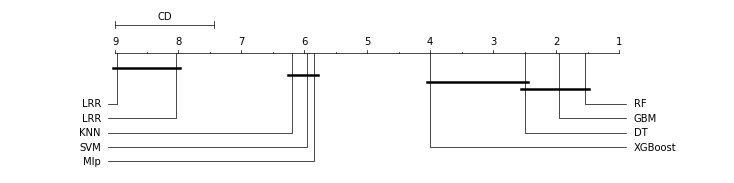

In [13]:

lista_param=[
{},
{},
{'kernel': 'rbf', 'C': 6,'probability':True},
{'weights': 'distance', 'n_neighbors': 8, 'n_jobs': -1, 'leaf_size': 2, 'algorithm': 'auto'},
{'n_estimators':500,'max_depth':5},
{'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
{'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
{'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
{'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

pcr_unb=k_fold_cross_validation(data_pcr_unb.iloc[:,0:16],data_pcr_unb['Class'],lista_param) 

mean_performace(pcr_unb)
d_pcr_unb_average_ranks=calculate_average_ranks(pcr_unb)
plot_critical_difference(pcr_unb,d_pcr_unb_average_ranks,'model_evaluation_pcr_unbalanced.jpg')


# both balanced test

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
P-value: 2.72716099654581e-29 t-Statistic: 253.074
Difference between mean performance is probably real
DT average rank: 2.65
RF average rank: 1.41
GBM average rank: 1.94
XGBoost average rank: 4.0
Mlp average rank: 5.64
SVM average rank: 5.96
KNN average rank: 6.4
LRR average rank: 8.98
LRR average rank: 8.02


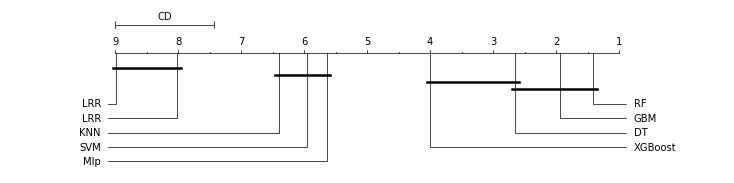

In [14]:

lista_param=[{},{},{'kernel': 'rbf', 'C': 9,'probability':True},
             {'weights': 'distance','n_neighbors': 8, 'n_jobs': -1,'leaf_size': 5, 'algorithm': 'brute'},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'max_iter': 1200,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
            {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]


both_test=k_fold_cross_validation(data_both.iloc[:,0:16],data_both['Class'],lista_param) 

mean_performace(both_test)
both_test_average_ranks=calculate_average_ranks(both_test)
plot_critical_difference(both_test,both_test_average_ranks,'model_evaluation_bothtest_balanced.jpg')


# both unbalanced test

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
P-value: 7.80949605542248e-24 t-Statistic: 221.810
Difference between mean performance is probably real
DT average rank: 1.66
RF average rank: 1.72
GBM average rank: 2.62
XGBoost average rank: 4.0
Mlp average rank: 5.36
SVM average rank: 5.64
KNN average rank: 7.0
LRR average rank: 9.0
LRR average rank: 8.0


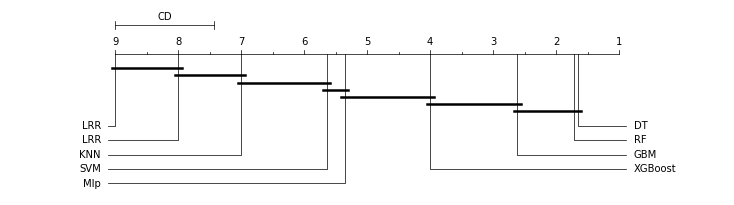

In [15]:

lista_param=[{},{},{'kernel': 'rbf', 'C': 8,'probability':True},
             {'n_neighbors': 15},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
            {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]


both_test_unb=k_fold_cross_validation(both_data_unb.iloc[:,0:16],both_data_unb['Class'],lista_param) 

mean_performace(both_test_unb)
both_test_unb_average_ranks=calculate_average_ranks(both_test_unb)
plot_critical_difference(both_test_unb,both_test_unb_average_ranks,'model_evaluation_bothtest_unbalanced.jpg')
